# Loading The Data
**https://www.kaggle.com/datasets/wordsforthewise/lending-club**

The main goal is to build a model that can predict wether the borrower will pay back the loan.

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_palette('Set2')

In [439]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [440]:
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [442]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Exploratory Data Analysis

<Axes: xlabel='loan_status', ylabel='count'>

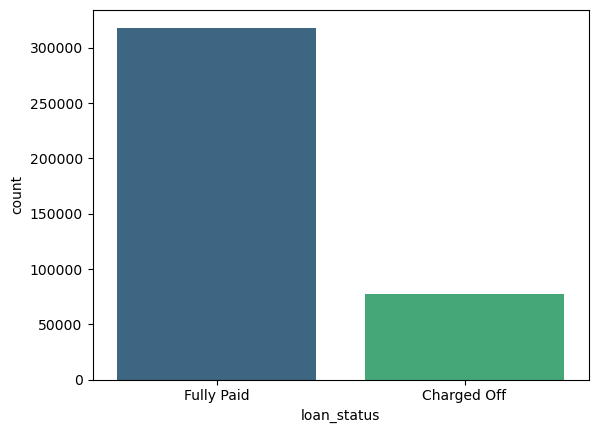

In [443]:
sns.countplot(data=df,x='loan_status',palette='viridis')

<Axes: >

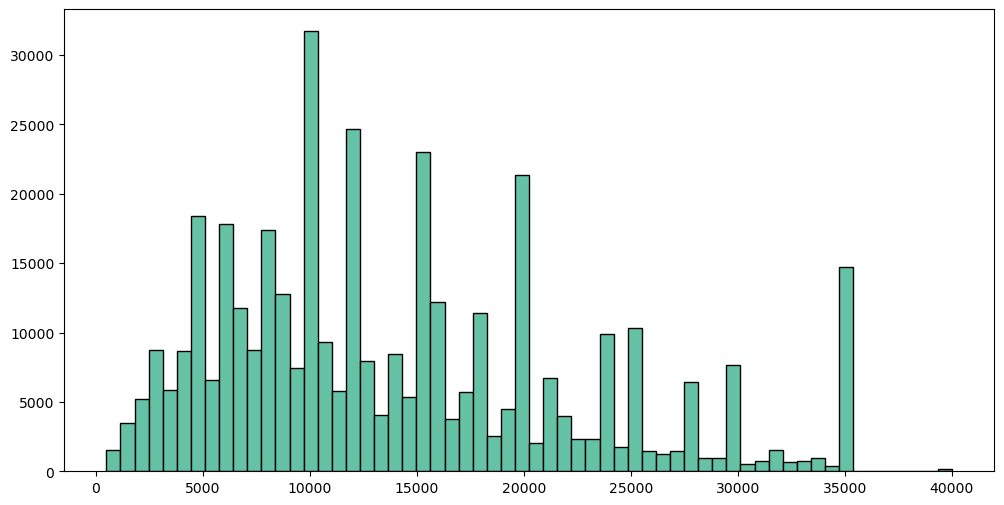

In [444]:
df['loan_amnt'].hist(figsize=(12,6),bins=60,grid=False,edgecolor='black')

<Axes: >

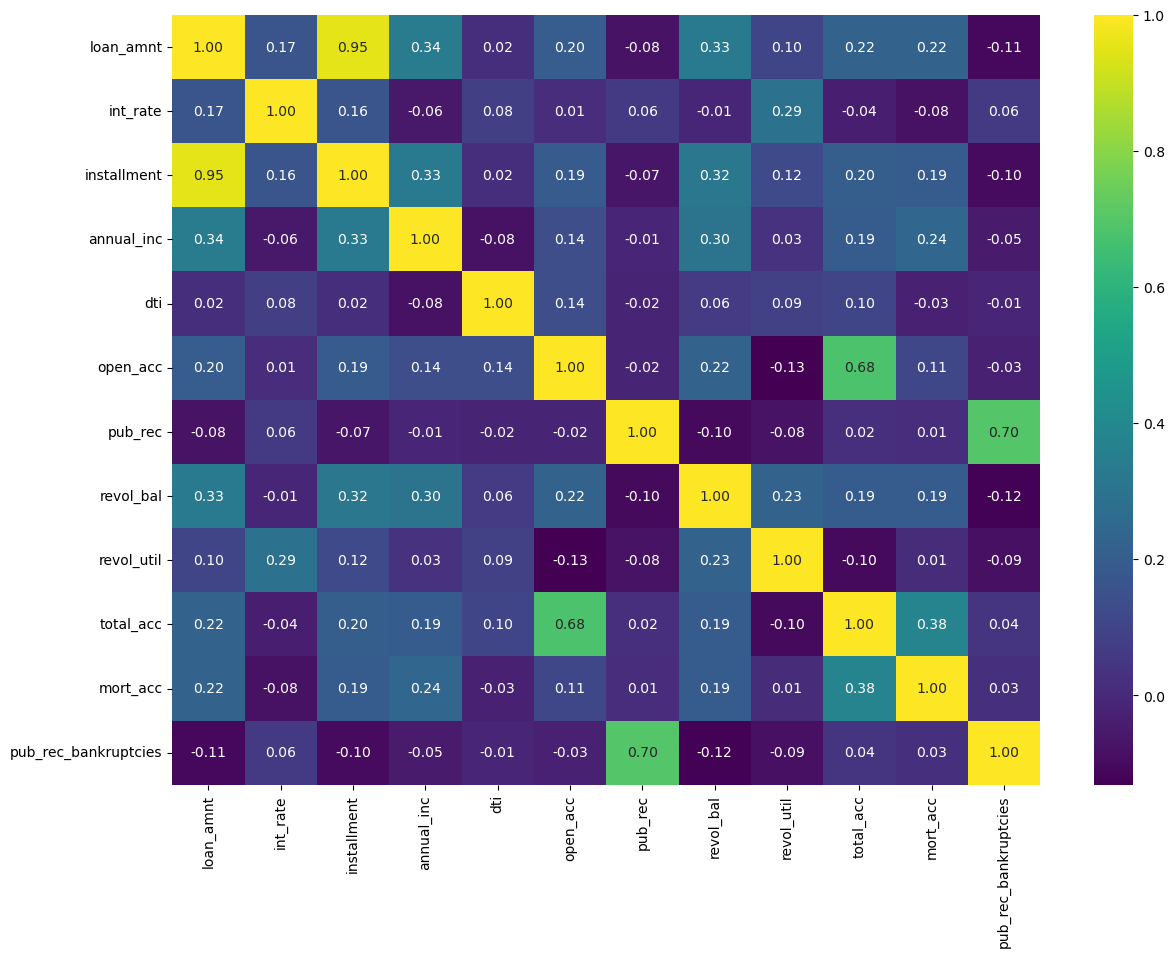

In [445]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis', fmt=".2f")

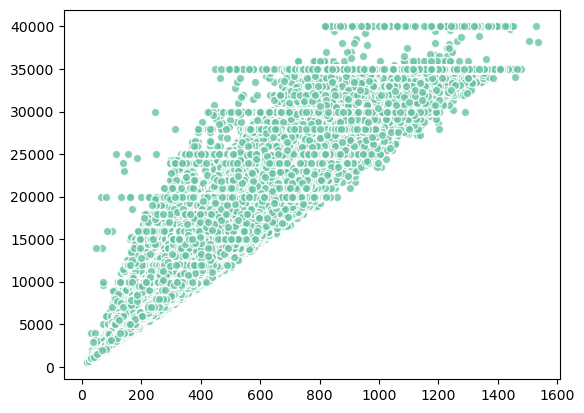

In [446]:
fig, ax = plt.subplots()
ax.scatter(df['installment'], df['loan_amnt'],alpha=0.8,edgecolors='white')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

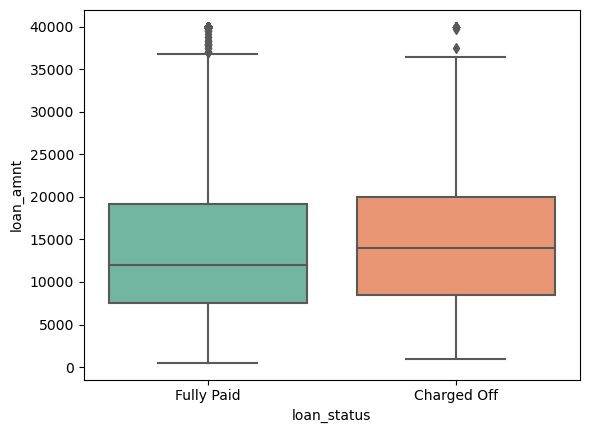

In [447]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

In [448]:
df.groupby('loan_status').describe().iloc[:,:8]

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               
                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0

In [449]:
df['grade'].sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [450]:
df['sub_grade'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

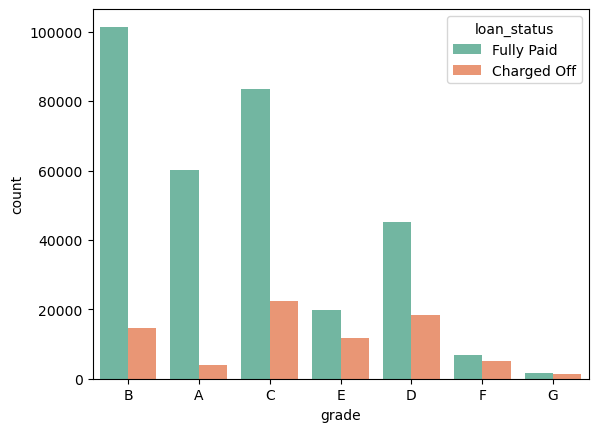

In [451]:
sns.countplot(data=df,x='grade',hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

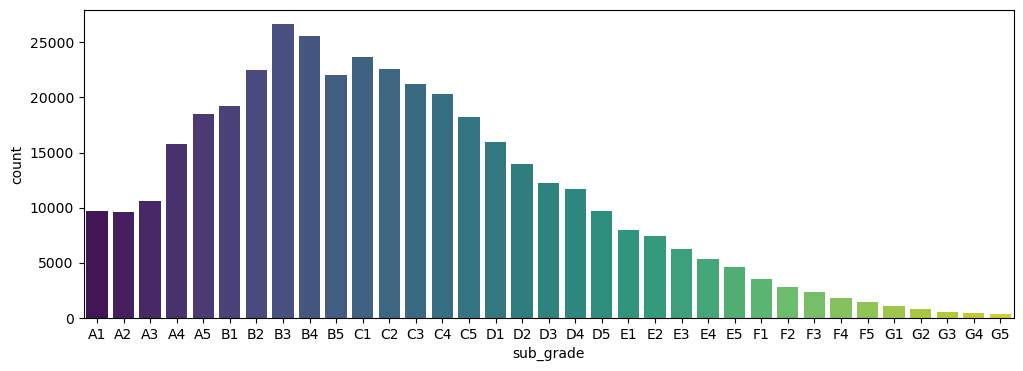

In [452]:
plt.figure(figsize=(12,4))
sns.countplot(x=df['sub_grade'].sort_values(),palette='viridis')

<Axes: xlabel='sub_grade', ylabel='count'>

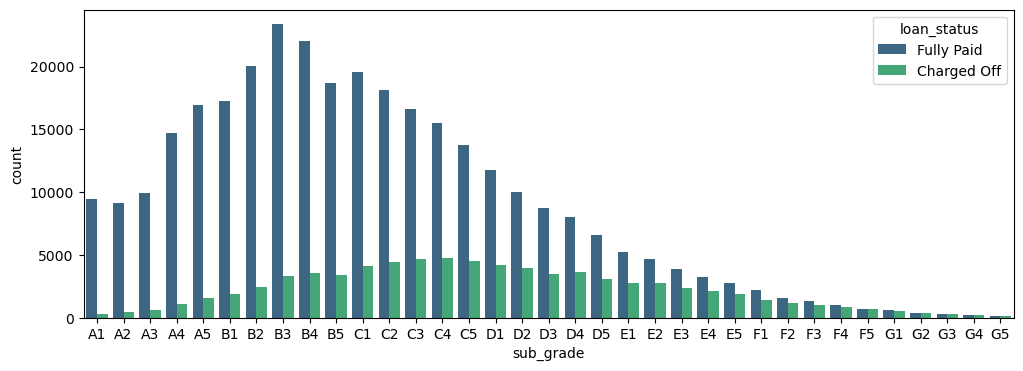

In [453]:
plt.figure(figsize=(12,4))
sns.countplot(data=df.sort_values('sub_grade'),x='sub_grade',hue='loan_status',palette='viridis')

<Axes: xlabel='sub_grade', ylabel='count'>

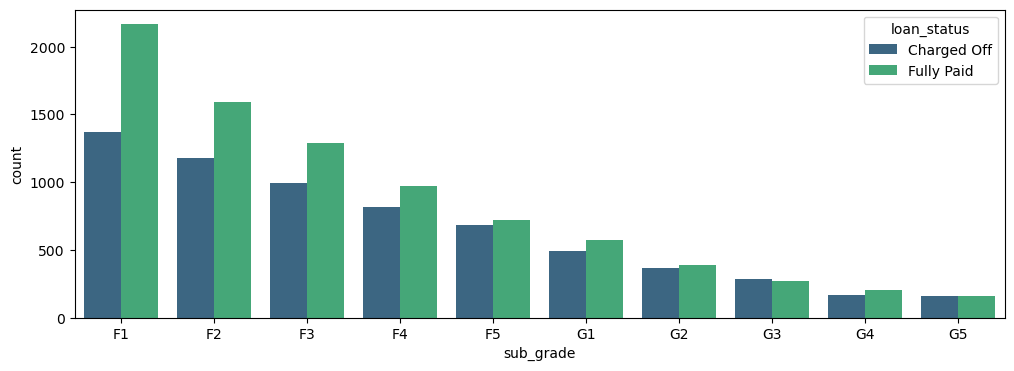

In [454]:
plt.figure(figsize=(12,4))
df_grade_fg = df[(df['grade']=='F') | (df['grade']=='G')].sort_values('sub_grade')
sns.countplot(data=df_grade_fg,x='sub_grade',hue='loan_status',palette='viridis')

In [455]:
def dummies_and_drop(column):
    try:
        dummies = pd.get_dummies(df[column], drop_first=True)
        df.drop(column, axis=1, inplace=True)
        return pd.concat([df, dummies], axis=1)
    except:
        print(f'No column labeled as {column}')
        return df

In [456]:
df = dummies_and_drop('loan_status')

# Missing Data

In [457]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Fully Paid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


<Axes: ylabel='Fully Paid'>

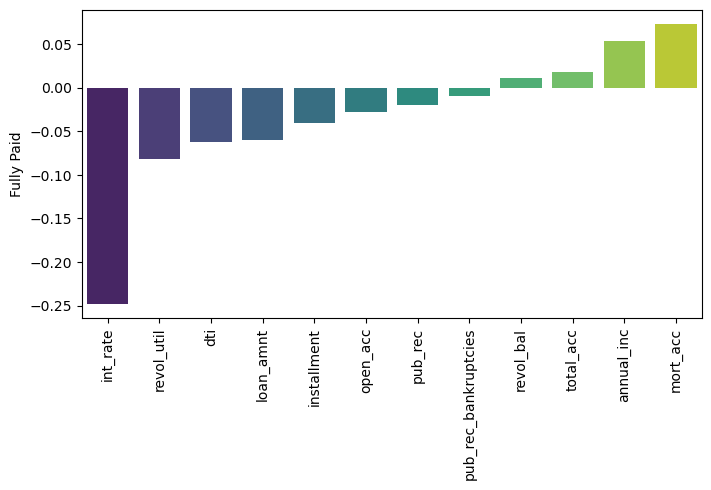

In [458]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
data = df.corr()['Fully Paid'].sort_values()
data = data[data.index != 'Fully Paid']
sns.barplot(x=data.index,y=data,palette='viridis')

In [459]:
df_length = len(df)
print(f'Dataframe length: {df_length}')
df.isnull().sum()

Dataframe length: 396030


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Fully Paid                  0
dtype: int64

In [460]:
100 * df.isnull().sum() / df_length

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
Fully Paid              0.000000
dtype: float64

In [461]:
df['emp_title'].nunique()

173105

In [462]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [463]:
df.drop('emp_title',axis=1,inplace=True)

In [464]:
df['emp_length'].sort_values().value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [465]:
emp_order = ['< 1 year',
             '1 year',
             '2 years',
             '3 years',
             '4 years',
             '5 years',
             '6 years',
             '7 years',
             '8 years',
             '9 years',
             '10+ years'
             ]

<Axes: xlabel='emp_length', ylabel='count'>

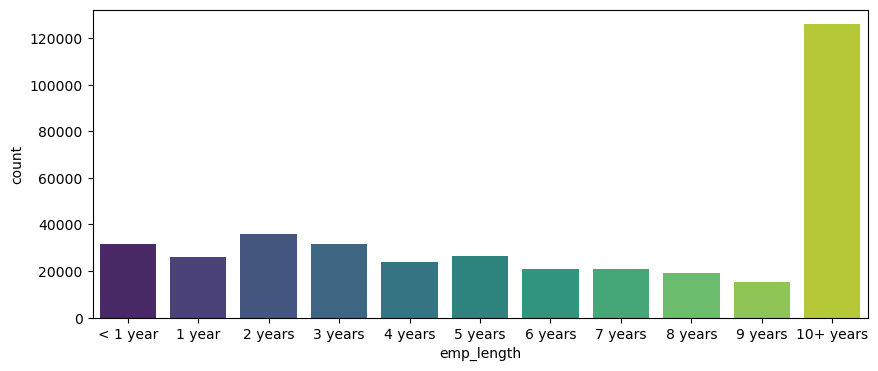

In [466]:
plt.figure(figsize=(10,4))
sns.countplot(x=df['emp_length'],order=emp_order,palette='viridis')

<Axes: xlabel='emp_length', ylabel='count'>

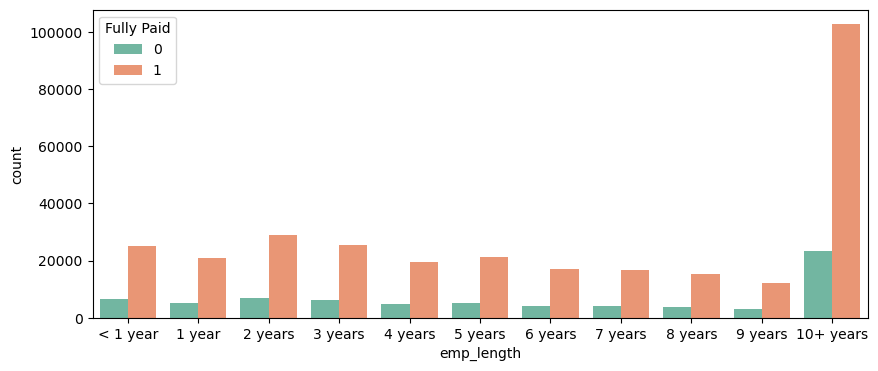

In [467]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df,order=emp_order,hue='Fully Paid')

In [468]:
year_df = pd.DataFrame(columns=['emp_length','Fully Paid','Charged Off'])

for year in emp_order:
    fully_paid = len(df[ (df['emp_length']==year) & (df['Fully Paid']==1) ])
    charged_off = len(df[ (df['emp_length']==year) & (df['Fully Paid']==0) ])
    
    values = [year, fully_paid, charged_off]
    
    year_df.loc[len(year_df)] = values

In [469]:
year_df['Percent'] = round(year_df['Charged Off']/year_df['Fully Paid'],2)
year_df

,emp_length,Fully Paid,Charged Off,Percent
0,< 1 year,25162,6563,0.26
1,1 year,20728,5154,0.25
2,2 years,28903,6924,0.24
3,3 years,25483,6182,0.24
4,4 years,19344,4608,0.24
5,5 years,21403,5092,0.24
6,6 years,16898,3943,0.23
7,7 years,16764,4055,0.24
8,8 years,15339,3829,0.25
9,9 years,12244,3070,0.25


<Axes: xlabel='emp_length', ylabel='Percent'>

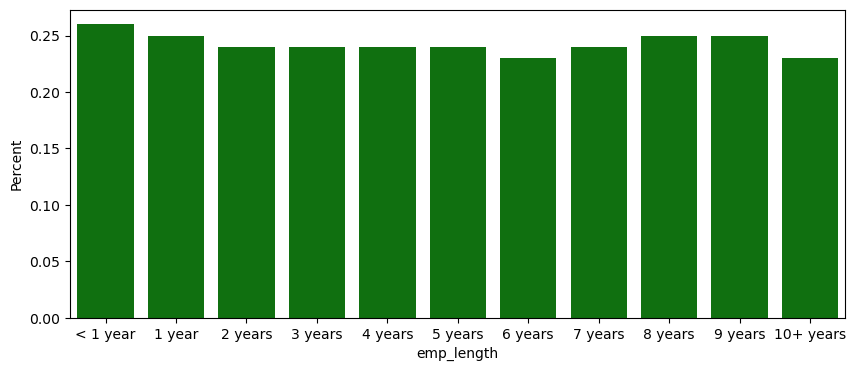

In [470]:
plt.figure(figsize=(10,4))
sns.barplot(data=year_df,x='emp_length',y='Percent',color='green')

In [471]:
df.drop('emp_length',axis=1,inplace=True)

In [472]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [473]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [474]:
df.drop('title',axis=1,inplace=True)

In [475]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [476]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
Fully Paid              0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [477]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [478]:
print("Mean of mort_acc column per total_acc")
total_acc_avg

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [479]:
def mort_acc_fill(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [480]:
df['mort_acc'] = df.apply(lambda x: mort_acc_fill(x['total_acc'], x['mort_acc']), axis=1)

In [481]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
Fully Paid                0
dtype: int64

In [482]:
df.dropna(inplace=True)
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
Fully Paid              0
dtype: int64

# Categorical Variables and Dummy Variables

In [483]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [484]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [485]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [486]:
df.drop('grade',axis=1,inplace=True)

In [487]:
df = dummies_and_drop('sub_grade')
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,vacation,26.24,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,credit_card,12.79,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,credit_card,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,33.95,...,0,0,0,0,0,0,0,0,0,0


In [488]:
df.select_dtypes(['object']).nunique()

home_ownership              6
verification_status         3
issue_d                   112
purpose                    14
earliest_cr_line          684
initial_list_status         2
application_type            3
address                392898
dtype: int64

In [489]:
df = dummies_and_drop('verification_status')
df = dummies_and_drop('application_type')
df = dummies_and_drop('initial_list_status')
df = dummies_and_drop('purpose')

In [490]:
df.select_dtypes(['object']).nunique()

home_ownership           6
issue_d                112
earliest_cr_line       684
address             392898
dtype: int64

In [491]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [492]:
df['address'] = df['address'].apply(lambda x:x[-5:])

In [493]:
df = dummies_and_drop('address')

In [494]:
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [495]:
df = df.replace(['NONE','ANY'],'OTHER')

In [496]:
df = dummies_and_drop('home_ownership')

In [497]:
df.drop('issue_d',axis=1,inplace=True)

In [498]:
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [499]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[-1]))

In [500]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

# Model

In [501]:
from sklearn.model_selection import train_test_split

In [502]:
X = df.drop('Fully Paid',axis=1).values
y = df['Fully Paid'].values

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [504]:
from sklearn.preprocessing import MinMaxScaler

In [505]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [506]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [507]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [508]:
model.fit(x=X_train, y=y_train, epochs=35, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/35
1158/1158 [==============================] - 6s 4ms/step - loss: 0.3159 - val_loss: 0.2650
Epoch 2/35
1158/1158 [==============================] - 4s 4ms/step - loss: 0.2688 - val_loss: 0.2622
Epoch 3/35
1158/1158 [==============================] - 4s 4ms/step - loss: 0.2653 - val_loss: 0.2615
Epoch 4/35
1158/1158 [==============================] - 4s 4ms/step - loss: 0.2635 - val_loss: 0.2613
Epoch 5/35
1158/1158 [==============================] - 4s 4ms/step - loss: 0.2627 - val_loss: 0.2612
Epoch 6/35
1158/1158 [==============================] - 4s 4ms/step - loss: 0.2619 - val_loss: 0.2611
Epoch 7/35
1158/1158 [==============================] - 4s 4ms/step - loss: 0.2616 - val_loss: 0.2605
Epoch 8/35
1158/1158 [==============================] - 4s 4ms/step - loss: 0.2610 - val_loss: 0.2610
Epoch 9/35
1158/1158 [==============================] - 4s 4ms/step - loss: 0.2609 - val_loss: 0.2610
Epoch 10/35
1158/1158 [==============================] - 4s 4ms/step - loss: 0.260

# Tests

In [509]:
losses = pd.DataFrame(model.history.history)

<Axes: >

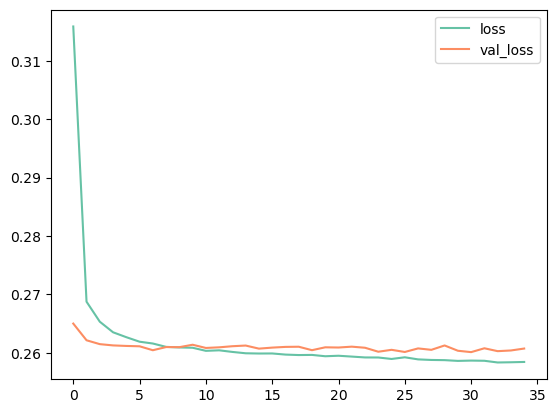

In [510]:
losses.plot()

In [511]:
from sklearn.metrics import classification_report,confusion_matrix

In [512]:
p = (model.predict(X_test) > 0.5).astype('int32')

3088/3088 [==============================] - 4s 1ms/step


In [513]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     19349
           1       0.88      1.00      0.93     79456

    accuracy                           0.89     98805
   macro avg       0.94      0.71      0.77     98805
weighted avg       0.90      0.89      0.87     98805



In [514]:
print(confusion_matrix(y_test,p))

[[ 8273 11076]
 [    8 79448]]


In [515]:
import random
random_ind = random.randint(0,len(df))

new_customer = df.drop('Fully Paid',axis=1).iloc[random_ind]
new_customer

loan_amnt      21000.00
term              60.00
int_rate          12.99
installment      477.71
annual_inc     55000.00
                 ...   
86630              0.00
93700              0.00
OTHER              0.00
OWN                0.00
RENT               0.00
Name: 32039, Length: 78, dtype: float64

In [516]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))
new_customer_prediction = (model.predict(new_customer) > 0.5).astype('int32').reshape(1)[0]
real_data = int(df.iloc[random_ind]['Fully Paid'])

print('\n')
print(f'Model prediction: {new_customer_prediction}')
print(f'Real data: {real_data}')
print('\n')
if new_customer_prediction == real_data:
    end_message = 'The model succesfully predicted the outcome!'
else:
    end_message = "The Model wasn't able to predict the outcome!"

print(end_message)

1/1 [==============================] - 0s 67ms/step


Model prediction: 1
Real data: 1


The model succesfully predicted the outcome!
